# Tarea 3 NLTK 👅- Modelos de Inteligencia Artificial

El **kit de herramientas de lenguaje natural**, o más comúnmente **NLTK**, es un conjunto de bibliotecas y programas para el procesamiento del lenguaje natural (PLN) simbólico y estadísticos para el lenguaje de programación Python. NLTK incluye demostraciones gráficas y datos de muestra. Se acompaña de un libro que explica los conceptos subyacentes a las tareas de procesamiento del lenguaje compatibles el toolkit, además de programas de ejemplo. NLTK está destinado a apoyar la investigación y la enseñanza en procesamiento de lenguaje natural (PLN) o áreas muy relacionadas, que incluyen la lingüística empírica, las ciencias cognitivas, la inteligencia artificial, la recuperación de información, y el aprendizaje de la máquina. NLTK se ha utilizado con éxito como herramienta de enseñanza, como una herramienta de estudio individual, y como plataforma para los sistemas de investigación de prototipos y construcción.



![Procesamiento del lenguaje natural](https://upload.wikimedia.org/wikipedia/commons/8/86/Noun_phrase_chunking_with_NLTK.svg)

In [ ]:
# Instalación y descarga del paquete básico de funcionalidades de NLTK

!pip install nltk 
import nltk #En primer lugar importamos Natural Language Toolkit.
nltk.download("popular") 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
# Ahora descargamos WordNet que es una base de datos semántica que 
# contiene las relaciones léxicas entre las palabras.

nltk.download('wordnet') 
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---

**1.** Obtén los diferentes synsets (conjuntos de sinónimos) para cada una de las siguientes palabras: mosquito, tsetse, house, spider y cockroach

In [ ]:
words = ["mosquito", "tsetse", "house", "spider", "cockroach"]

for word in words:
    synsets = wn.synsets(word)
    print(f"{word}: {synsets}")

mosquito: [Synset('mosquito.n.01')]
tsetse: [Synset('tsetse_fly.n.01')]
house: [Synset('house.n.01'), Synset('firm.n.01'), Synset('house.n.03'), Synset('house.n.04'), Synset('house.n.05'), Synset('house.n.06'), Synset('house.n.07'), Synset('sign_of_the_zodiac.n.01'), Synset('house.n.09'), Synset('family.n.01'), Synset('theater.n.01'), Synset('house.n.12'), Synset('house.v.01'), Synset('house.v.02')]
spider: [Synset('spider.n.01'), Synset('spider.n.02'), Synset('spider.n.03')]
cockroach: [Synset('cockroach.n.01')]


**2.** Muestra la definición de cada uno de los sentidos o synsets de las palabras del punto 1.

In [ ]:
for word in words:
    synsets = wn.synsets(word)
    for synset in synsets:
        definition = synset.definition()
        print(f"{word} ({synset.name()}): {definition}")

mosquito (mosquito.n.01): two-winged insect whose female has a long proboscis to pierce the skin and suck the blood of humans and animals
tsetse (tsetse_fly.n.01): bloodsucking African fly; transmits sleeping sickness etc.
house (house.n.01): a dwelling that serves as living quarters for one or more families
house (firm.n.01): the members of a business organization that owns or operates one or more establishments
house (house.n.03): the members of a religious community living together
house (house.n.04): the audience gathered together in a theatre or cinema
house (house.n.05): an official assembly having legislative powers
house (house.n.06): aristocratic family line
house (house.n.07): play in which children take the roles of father or mother or children and pretend to interact like adults
house (sign_of_the_zodiac.n.01): (astrology) one of 12 equal areas into which the zodiac is divided
house (house.n.09): the management of a gambling house or casino
house (family.n.01): a social uni

**3.** Si alguna de las palabras tuviera más de un posible sentido (synset), deberás seleccionar un único sentido para poder seguir desarrollando la actividad.

Utiliza un método basado en la similitud entre palabras para escoger un único sentido para las palabras que tengan más de un posible sentido (synset). Concretamente utiliza la medida de similitud entre sentidos basada en la longitud del camino para seleccionar el sentido más similar de la palabra que tiene múltiples sentidos con respecto al resto de las palabras.

Indica en el informe las decisiones de diseño que hayas tomado para implementar este método de selección. Podemos ver la similitud basada en la longitud del camino usando el método path_similarity() y podemos comprobar que el sentido de spider.n.01 es más cercano al resto de palabras que los otros dos sentidos. La similitud entre las palabras se calcula como la inversa de (1+El número de saltos que hay que realizar por el árbol para ir del sentido de una palabra al sentido de la otra)

In [ ]:
synset_words = []
for word in words:
    synsets = wn.synsets(word)
    if len(synsets) > 1:

        # Asumimos que la primera palabra del array es la base 
        # para comparar las similitudes
        base_word = words[0]
        base_synset = wn.synsets(base_word)[0]
        max_similarity = 0
        best_synset = None

        # Recorremos los synsets de la palabra actual para calcular la 
        # similitud con el primer synset de la base_word
        for synset in synsets:
            similarity = synset.path_similarity(base_synset)
            if similarity > max_similarity:
                max_similarity = similarity
                best_synset = synset

        # Asignamos el mejor synset encontrado para esta palabra
        synsets = [best_synset]

    for synset in synsets:
        synset_words.append(synset)
        definition = synset.definition()
        print(f"{word} ({synset.name()}): {definition}")

mosquito (mosquito.n.01): two-winged insect whose female has a long proboscis to pierce the skin and suck the blood of humans and animals
tsetse (tsetse_fly.n.01): bloodsucking African fly; transmits sleeping sickness etc.
house (house.n.01): a dwelling that serves as living quarters for one or more families
spider (spider.n.01): predatory arachnid with eight legs, two poison fangs, two feelers, and usually two silk-spinning organs at the back end of the body; they spin silk to make cocoons for eggs or traps for prey
cockroach (cockroach.n.01): any of numerous chiefly nocturnal insects; some are domestic pests


In [ ]:
synset_words

[Synset('mosquito.n.01'),
 Synset('tsetse_fly.n.01'),
 Synset('house.n.01'),
 Synset('spider.n.01'),
 Synset('cockroach.n.01')]

**4.** Una vez hayas seleccionado un único sentido para cada una de las palabras, para cada uno de esos cinco synsets muestra las 
palabras que son sinónimos y que conforman el synset, es decir los sinónimos que comparten un mismo significado.

In [ ]:
# Se utiliza el método lemma_names() para obtener 
# las palabras que conforman el synset.

for index in range(len(synset_words)):
  synset = synset_words[index]
  print(f"{words[index]} ({synset.name()}): {synset.lemma_names()}")

mosquito (mosquito.n.01): ['mosquito']
tsetse (tsetse_fly.n.01): ['tsetse_fly', 'tsetse', 'tzetze_fly', 'tzetze', 'glossina']
house (house.n.01): ['house']
spider (spider.n.01): ['spider']
cockroach (cockroach.n.01): ['cockroach', 'roach']


**5.** Para cada uno de los cinco synsets obtén las palabras que son hipónimos del sentido de la palabra.

In [ ]:
for index in range(len(synset_words)):
  synset = synset_words[index]
  hyponyms = synset.hyponyms()
  hyponyms_words = []
  for hyponym in hyponyms:
    hyponyms_words.extend(hyponym.lemma_names())
  print(f"{words[index]} ({synset.name()}): {hyponyms_words}")

mosquito (mosquito.n.01): ['anopheline', 'Asian_tiger_mosquito', 'Aedes_albopictus', 'common_mosquito', 'Culex_pipiens', 'Culex_quinquefasciatus', 'Culex_fatigans', 'gnat', 'malarial_mosquito', 'malaria_mosquito', 'yellow-fever_mosquito', 'Aedes_aegypti']
tsetse (tsetse_fly.n.01): []
house (house.n.01): ['beach_house', 'boarding_house', 'boardinghouse', 'bungalow', 'cottage', 'cabin', 'chalet', 'chapterhouse', 'fraternity_house', 'frat_house', 'country_house', 'detached_house', 'single_dwelling', 'dollhouse', "doll's_house", 'duplex_house', 'duplex', 'semidetached_house', 'farmhouse', 'gatehouse', 'guesthouse', 'hacienda', 'lodge', 'hunting_lodge', 'lodging_house', 'rooming_house', 'maisonette', 'maisonnette', 'mansion', 'mansion_house', 'manse', 'hall', 'residence', 'ranch_house', 'residence', 'row_house', 'town_house', 'safe_house', 'saltbox', 'sod_house', 'soddy', 'adobe_house', 'solar_house', 'tract_house', 'villa']
spider (spider.n.01): ['barn_spider', 'Araneus_cavaticus', 'black_

**6.** Para cada uno de los cinco synsets obtén las palabras que son hiperónimos del sentido de la palabra, de hecho, muestra toda la 
jerarquía de hiperónimos no solo el hiperónimo directo.

In [ ]:
def print_hypernyms(synset):
    hypernyms = synset.hypernyms()
    if hypernyms:
        for hypernym in hypernyms:
            print(f"  {hypernym.name()}: {hypernym.lemma_names()}")
            print_hypernyms(hypernym)

for synset in synset_words:
    print(f"{synset.name()}: {synset.lemma_names()}")
    print_hypernyms(synset)
    print()

mosquito.n.01: ['mosquito']
  dipterous_insect.n.01: ['dipterous_insect', 'two-winged_insects', 'dipteran', 'dipteron']
  insect.n.01: ['insect']
  arthropod.n.01: ['arthropod']
  invertebrate.n.01: ['invertebrate']
  animal.n.01: ['animal', 'animate_being', 'beast', 'brute', 'creature', 'fauna']
  organism.n.01: ['organism', 'being']
  living_thing.n.01: ['living_thing', 'animate_thing']
  whole.n.02: ['whole', 'unit']
  object.n.01: ['object', 'physical_object']
  physical_entity.n.01: ['physical_entity']
  entity.n.01: ['entity']

tsetse_fly.n.01: ['tsetse_fly', 'tsetse', 'tzetze_fly', 'tzetze', 'glossina']
  fly.n.01: ['fly']
  dipterous_insect.n.01: ['dipterous_insect', 'two-winged_insects', 'dipteran', 'dipteron']
  insect.n.01: ['insect']
  arthropod.n.01: ['arthropod']
  invertebrate.n.01: ['invertebrate']
  animal.n.01: ['animal', 'animate_being', 'beast', 'brute', 'creature', 'fauna']
  organism.n.01: ['organism', 'being']
  living_thing.n.01: ['living_thing', 'animate_thing'

**7.** Dibuja un tesauro donde se muestre la jerarquía de los cinco synsets y sus hiperónimos desde el nivel superior de la jerarquía hasta llegar al nivel donde aparezcan los sentidos de las cinco palabras analizadas.

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display
import matplotlib.pyplot as plt

# Función recursiva que dibuja un tesauro que representa 
# la jerarquía semántica de los synsets en un grafo dirigido.
def draw_synset(synset, synset_father):
    synset_node = str(synset.offset())
    tesauro.node(synset_node, synset.name())
    if synset_father:
      tesauro.edge(synset_father, synset_node)
    for hypernym in synset.hyponyms():
        draw_synset(hypernym, synset_node)

for synset in synset_words:
    tesauro = Digraph(format="jpg")
    draw_synset(synset, None)
    tesauro.render(synset.name(), view=True)

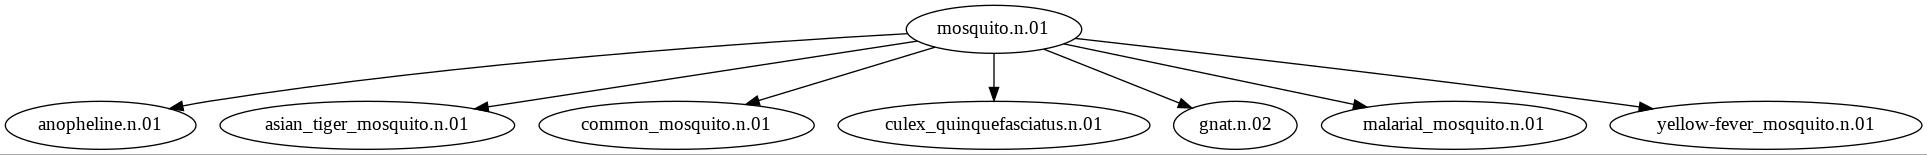

In [ ]:
Image(filename="mosquito.n.01.jpg")

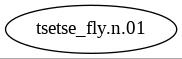

In [ ]:
Image(filename="tsetse_fly.n.01.jpg")

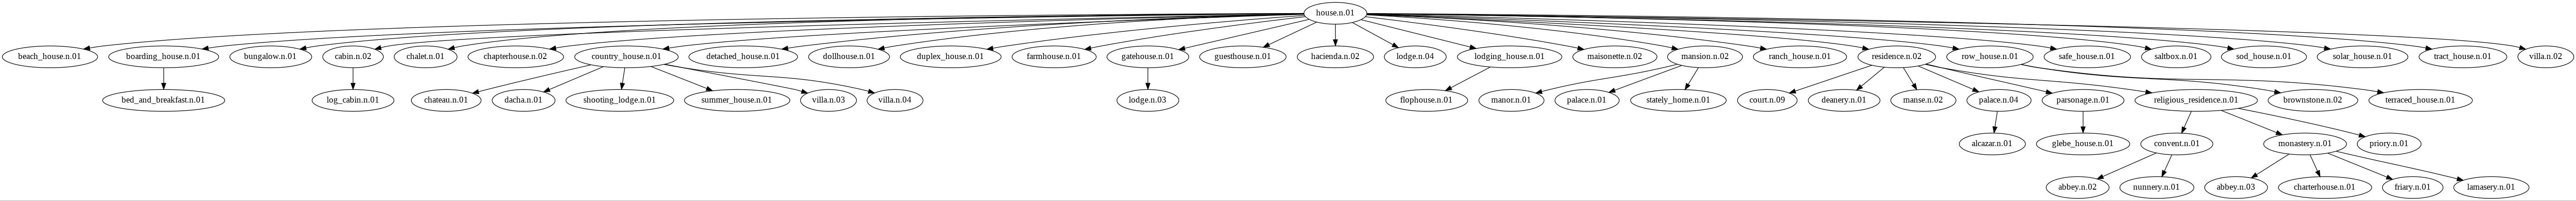

In [ ]:
Image(filename="house.n.01.jpg")

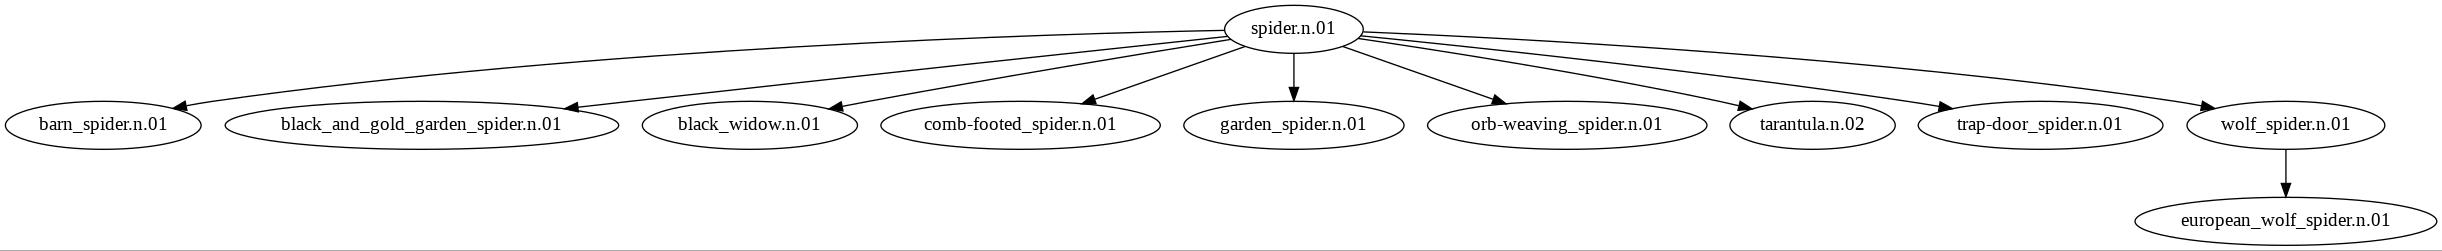

In [ ]:
Image(filename="spider.n.01.jpg")

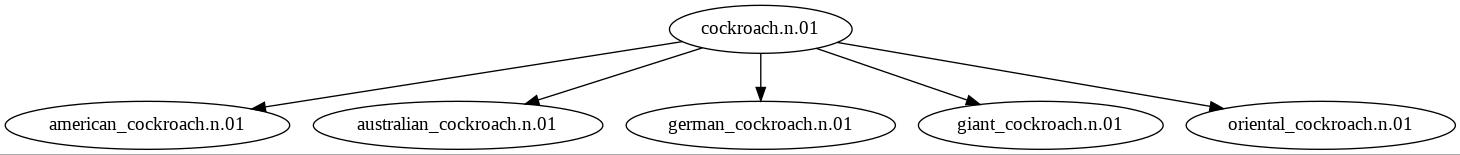

In [ ]:
Image(filename="cockroach.n.01.jpg")

**8.** Calcula el ancestro común mas bajo para cada posible par de synsets (considerando los 5 synsets seleccionados anteriormente). 
Comenta en el informe que significa esta medida y cómo se observa en el tesauro que has dibujado en el punto 7.

In [ ]:
from os import name

for i in range(len(synset_words)):
    for j in range(i+1, len(synset_words)):
        lca = synset_words[i].lowest_common_hypernyms(synset_words[j])
        print(f"{synset_words[i].name()} - {synset_words[j].name()}: {lca[0].name()}")

mosquito.n.01 - tsetse_fly.n.01: dipterous_insect.n.01
mosquito.n.01 - house.n.01: whole.n.02
mosquito.n.01 - spider.n.01: arthropod.n.01
mosquito.n.01 - cockroach.n.01: insect.n.01
tsetse_fly.n.01 - house.n.01: whole.n.02
tsetse_fly.n.01 - spider.n.01: arthropod.n.01
tsetse_fly.n.01 - cockroach.n.01: insect.n.01
house.n.01 - spider.n.01: whole.n.02
house.n.01 - cockroach.n.01: whole.n.02
spider.n.01 - cockroach.n.01: arthropod.n.01


La medida del ancestro común más bajo es una forma de medir la similitud semántica entre dos palabras. El LCA es el nodo más bajo en la jerarquía de WordNet en el que dos synsets comparten un ancestro común. Por ejemplo, el LCA entre "mosquito" y "tsetse_fly" es "insect", ya que ambas palabras son tipos de insectos y "insect" es el nodo más bajo en la jerarquía en el que ambas palabras tienen un ancestro común.

**9.** Calcula la profundidad de cada uno de los cinco synsets. Comenta en el informe que signi_ca esta medida y cómo se observa en 
el tesauro que has dibujado en el punto 7.

In [ ]:
for synset in synset_words:
    depth = synset.max_depth()
    print(f"{synset.name()}: {depth}")

mosquito.n.01: 11
tsetse_fly.n.01: 12
house.n.01: 8
spider.n.01: 10
cockroach.n.01: 11


La medida de profundidad de un synset se refiere a la distancia entre el synset y el nodo raíz de la jerarquía de WordNet. Un synset con una profundidad mayor se encuentra más lejos de la raíz y está más especializado, mientras que un synset con una profundidad menor se encuentra más cerca de la raíz y es más general. Por ejemplo, el synset de "mosquito" tendrá una profundidad mayor que el synset de "insecto", ya que "mosquito" es una especie específica dentro de la jerarquía de "insecto".

**10.** Por último, indica que par de palabras de las cinco que has analizado en este laboratorio son las más similares, utiliza una medida de similitud diferente a la presentada en el punto 3.

Relaciona el resultado obtenido con los valores de los ancestros común más bajos calculados en el punto 8 y los valores de las profundidades calculada en el punto 9.

Es decir, explica cómo se ha medido la similitud entre palabras.

In [ ]:
max_similarity = 0
max_pair = None

for i in range(len(synset_words)):
    for j in range(i + 1, len(synset_words)):
        synset1 = synset_words[i]
        synset2 = synset_words[j]
        lowest_common_hypernym = synset1.lowest_common_hypernyms(synset2)[0]
        depth1 = synset1.shortest_path_distance(lowest_common_hypernym)
        depth2 = synset2.shortest_path_distance(lowest_common_hypernym)
        jaccard_similarity = len(lowest_common_hypernym.lemmas()) / (depth1 + depth2 - 2*len(lowest_common_hypernym.lemmas()))
        if jaccard_similarity > max_similarity:
            max_similarity = jaccard_similarity
            max_pair = (synset1, synset2)

print(f"{max_pair[0]} - {max_pair[1]}: {max_similarity}")

Synset('mosquito.n.01') - Synset('cockroach.n.01'): 0.5


Una forma de medir la similitud entre palabras es utilizando el coeficiente de Jaccard, que se calcula dividiendo la cantidad de ancestros comunes entre la suma de la distancia más corta entre cada palabra y su ancestro común más cercano en el grafo de WordNet menos el número de ancestros comunes.

En este caso, para calcular la similitud entre cada par de palabras, primero se utiliza el método "lowest_common_hypernyms()" para obtener el ancestro común más cercano entre ambas palabras. Luego, se utiliza el método "shortest_path_distance()" para calcular la distancia más corta entre cada palabra y su ancestro común. Después, se calcula el coeficiente de Jaccard y se compara con el valor máximo de similitud anteriormente encontrado. Si el coeficiente de Jaccard es mayor que el máximo, se actualiza el valor de la máxima similitud y el par de palabras correspondiente.

Finalmente, se imprime el par de palabras más similares junto con su similitud.